In [23]:
# IMPORTING NECESSARY PACKAGES ->
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

In [24]:
# LOAD THE TRAINING AND TESTING DATA
x_train=pd.read_csv('C:\\Users\\anura\\Downloads\\fashion-mnist_train.csv\\fashion-mnist_train.csv')
x_test=pd.read_csv('C:\\Users\\anura\\Downloads\\fashion-mnist_test.csv (1)\\fashion-mnist_test.csv')
x_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
x_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
x_train.shape

(60000, 785)

In [27]:
x_test.shape

(10000, 785)

In [28]:
# y_train=train['label']
# y_test=test['label']

y_train = x_train['label'].values
x_train = x_train.drop(columns=['label']).values

In [29]:
# x_train=train.iloc[:,1:]
# x_test=test.iloc[:,1:]

y_test = x_test['label'].values
x_test = x_test.drop(columns=['label']).values

In [30]:
# reshapeing the training and testing datasets 
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [31]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [32]:
x_train=x_train/255
x_test=x_test/255

In [33]:
# Defining the model architecture 

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

C:\Users\anura\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,354 (255.29 KB)

 Trainable params: 65,354 (255.29 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
 # TRAIN THE MODEL  ->
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# hist=model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=10)
history = model.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.6500 - loss: 0.9648 - val_accuracy: 0.8284 - val_loss: 0.4907
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8317 - loss: 0.4586 - val_accuracy: 0.8547 - val_loss: 0.4111
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8566 - loss: 0.3903 - val_accuracy: 0.8593 - val_loss: 0.3934
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8775 - loss: 0.3433 - val_accuracy: 0.8634 - val_loss: 0.3769
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8806 - loss: 0.3238 - val_accuracy: 0.8739 - val_loss: 0.3473


In [35]:
# EVALUATE THE NETWORK
# model.evaluate(x_test,y_test)
test_loss , test_acc = model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8738 - loss: 0.3455
0.33595144748687744
0.8784000277519226


In [36]:
x_test.shape

(10000, 28, 28, 1)

In [37]:
x_test.shape[0]

10000

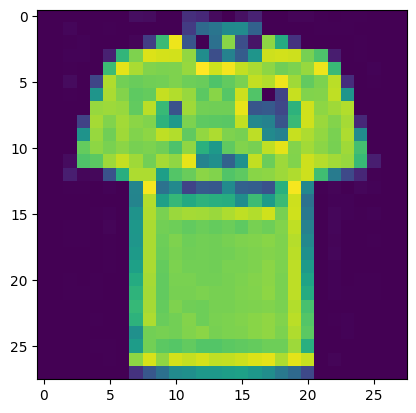

In [38]:
images = x_test.reshape(x_test.shape[0],28,28)
plt.imshow(images[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Predicted Result  Sandal


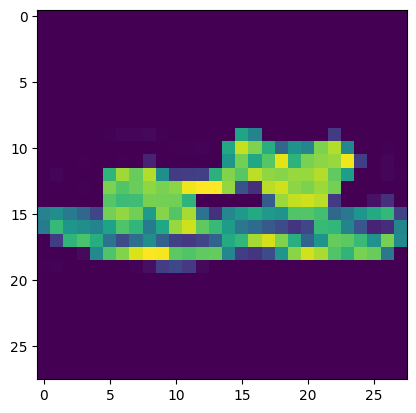

In [39]:
# predicting the class of images
class_labels = ['T-shirt/Tops', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle-boots']

n=np.random.randint(0,500)
plt.imshow(images[n])
predicted_values=model.predict(x_test)
print("Predicted Result ",class_labels[np.argmax(predicted_values[n])])

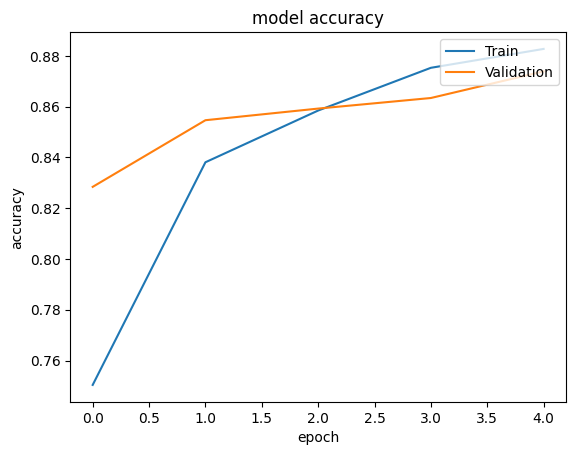

In [41]:
# Plotting The Training Accuracy :-
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend (['Train', 'Validation'], loc='upper right')
plt.show()

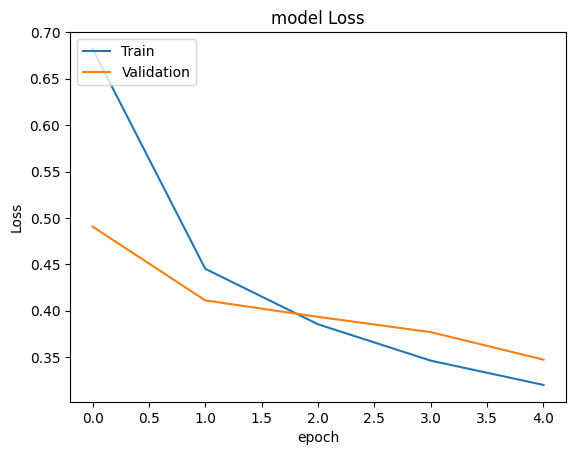

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()